In [171]:
%matplotlib inline
import pandas as pd
import numpy

In [172]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [173]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [174]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [175]:
cast['Supermen'] = cast[(cast.character == 'Superman')].groupby('year').size()

In [176]:
cast['Batmen'] = cast[(cast.character == 'Batman')].groupby('year').size()

In [177]:
cast[(cast.Supermen) > (cast.Batmen)][['Supermen','Batmen']]

,Supermen,Batmen
1973,2.0,1.0
2017,3.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [178]:
cast[(cast.Supermen) < (cast.Batmen)][['Supermen','Batmen']]

,Supermen,Batmen
2008,2.0,3.0
2009,1.0,3.0
2011,3.0,4.0
2013,1.0,4.0
2014,2.0,6.0
2015,1.0,3.0
2016,4.0,16.0


In [179]:
#7

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [180]:
actors = cast[(cast.type == 'actor')].groupby('year').size()

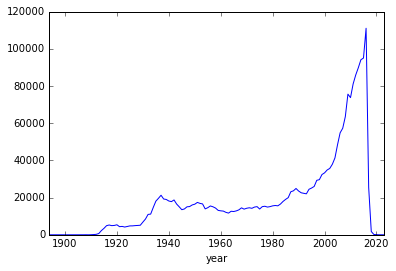

In [181]:
actors.plot()

In [182]:
actress = cast[(cast.type == 'actress')].groupby('year').size()

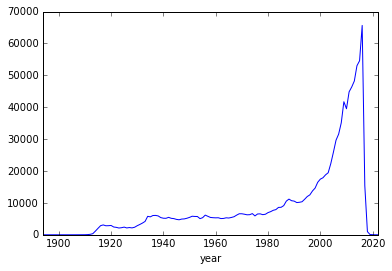

In [183]:
actress.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

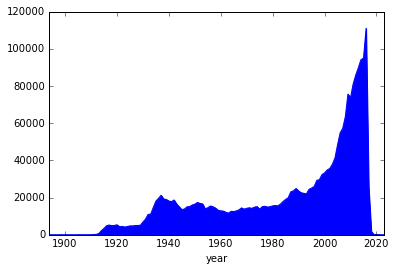

In [184]:
actors.plot(kind='area')

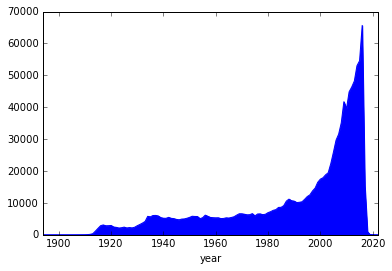

In [185]:
actress.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [186]:
act = pd.DataFrame(actors, columns=['num'])

In [187]:
act['fnum'] = actress

In [188]:
act = act.fillna(0)

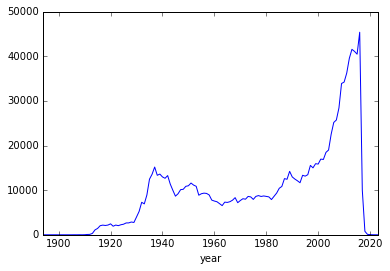

In [189]:
act['diff'] = act['num']-act['fnum']
act['diff'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [190]:
act['mfrac'] = act['num']/(act['num']+act['fnum'])

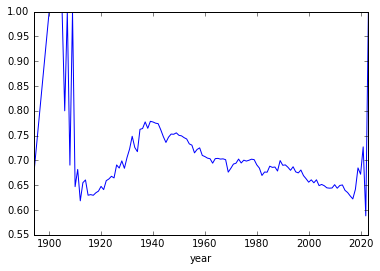

In [191]:
act['mfrac'].plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [192]:
actors = cast[(cast.type == 'actor') & (cast.n == 2)].groupby('year').size()

In [193]:
actress = cast[(cast.type == 'actress') & (cast.n==2)].groupby('year').size()

In [194]:
act2 = pd.DataFrame(actors, columns=['num'])

In [195]:
act2['fnum'] = actress

In [196]:
act2 = act2.fillna(0)

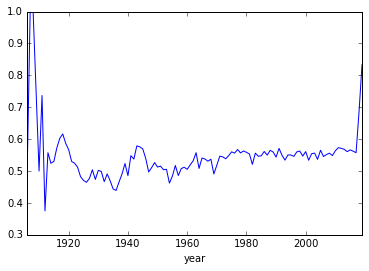

In [197]:
act2['mfrac'] = act2['num']/(act2['num']+act2['fnum'])
act2['mfrac'].plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [198]:
actors = cast[(cast.type == 'actor') & (cast.n == 3)].groupby('year').size()

In [199]:
actress = cast[(cast.type == 'actress') & (cast.n==3)].groupby('year').size()

In [200]:
act3 = pd.DataFrame(actors, columns=['num'])

In [201]:
act3['fnum'] = actress

In [202]:
act3 = act3.fillna(0)

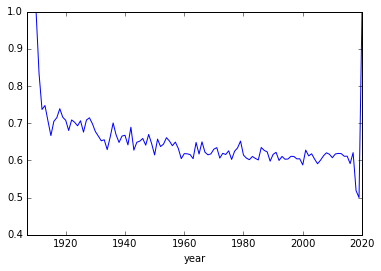

In [203]:
act3['mfrac'] = act3['num']/(act3['num']+act3['fnum'])
act3['mfrac'].plot()

In [204]:
actors = cast[(cast.type == 'actor') & (cast.n == 1)].groupby('year').size()

In [206]:
actress = cast[(cast.type == 'actress') & (cast.n==1)].groupby('year').size()

In [207]:
act1 = pd.DataFrame(actors, columns=['num'])

In [208]:
act1['fnum'] = actress

In [209]:
act1 = act1.fillna(0)

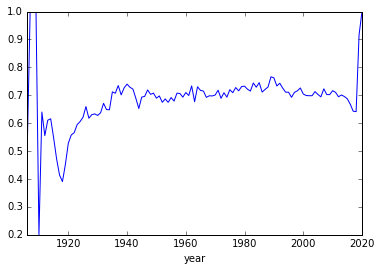

In [210]:
act1['mfrac'] = act1['num']/(act1['num']+act1['fnum'])
act1['mfrac'].plot()

In [211]:
final = pd.DataFrame(act1['mfrac'])

In [212]:
final.columns = ['n1']

In [213]:
final['n2'] = act2['mfrac']

In [214]:
final['n3'] = act3['mfrac']

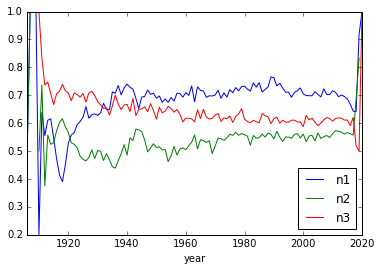

In [216]:
final.plot()